<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session4/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

### This code is an improvement over last network - 
* Used 1X1 to reduce # channels
* Used max pooling after few conv layers.
* Used Validation at every epoch.
* Used conv layers blocks of incresing no. of kernels. Tried various below iterations, can be seen commented in code cell  - 
  * (32 - 64 - 128)X2 blocks -> 195K params, Vtrain - 0.0285 , Vacc - 0.9929
  * (8 - 16 - 32)X2  blocks -> 17K params, Vtrain -0.9940, Vacc - 0.9882
  * (4 - 8 - 16)X2 blocks -> 8K params, Vtrain -0.9914, Vacc - 0.9879
  * (10 - 16 - 22)x2 block -> 14.7K params, Vtrain -0.9937, Vacc - 0.9897
  * (10 - 15)X2 block -> 13K params, Vtrain -0.9927, Vacc - 0.9889
  * (16 - 24)X3 block -> 13.5K params, Vtrain -0.9921, Vacc - 0.9903
  * (18 - 24)X3 block -> 15K params, Vtrain -0.9939, Vacc - 0.9913
  * (18 - 23)X3 block -> 14.3K params, Vtrain -0.99315, Vacc - 0.9909
  
### Learnings - 
* Increasing kernels drastically may not result in best results or increase Vacc too much
* Large no of kernels may be unused
* Similar/better results can be found out with less #kernels
* Architecture should be correct and well thought of. We should use blocks of conv layers with increasing #kernels
* max pool after only few conv layers

### Conclusion
* Fixed the architecture - use 2 or 3 blocks of conv layers, wth increasing #kernels.
* Choose combination of #kernels in layers according to #parameters required.
* We can see that we have reached 99.1+ Vacc, so now that means our architecture seems to be alright, now further improvement can be done by other optimizations.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


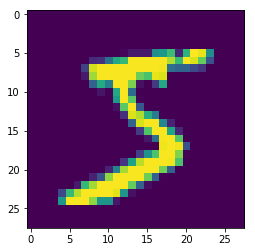

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


## (32 - 64 - 128) block -> 195K params, Vtrain - 0.0285 , Vacc - 0.9929
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, 1, 1, activation='relu'))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 7))
# model.add(Flatten())
# model.add(Activation('softmax'))

## (8 - 16 - 32) block -> 17K params, Vtrain -0.9940, Vacc - 0.9882
# model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(8, 1, 1, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 7))
# model.add(Flatten())
# model.add(Activation('softmax'))

## (4 - 8 - 16) block -> 8K params, Vtrain -0.9914, Vacc - 0.9879
# model.add(Convolution2D(4, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(8, 3, 3, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(4, 1, 1, activation='relu'))
# model.add(Convolution2D(8, 3, 3, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 7))
# model.add(Flatten())
# model.add(Activation('softmax'))

## (10 - 16 - 22) block -> 14.7K params, Vtrain -0.9937, Vacc - 0.9897
# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(22, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(10, 1, 1, activation='relu'))
# model.add(Convolution2D(16, 3, 3, activation='relu'))
# model.add(Convolution2D(22, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 7))
# model.add(Flatten())
# model.add(Activation('softmax'))

## (10 - 15) block -> 13K params, Vtrain -0.9927, Vacc - 0.9889
# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(15, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(10, 1, 1, activation='relu'))
# model.add(Convolution2D(15, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 10))
# model.add(Flatten())
# model.add(Activation('softmax'))

## (16 - 24)X3 block -> 13.5K params, Vtrain -0.9921, Vacc - 0.9903
## (18 - 24)X3 block -> 15K params, Vtrain -0.9939, Vacc - 0.9913
## (18 - 23)X3 block -> 14.3K params, Vtrain -0.993, Vacc - 0.9909
model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, activation='relu'))
model.add(Convolution2D(23, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))


## increasing kernels drastically may not result in best results
## arge no of kernels may be unused
## similar/better esults can be found out with less #kernels
## architecture shoiuld be correct and well thought of
## max pool after only few conv layers
## 

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activatio

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 23)        3749      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 23)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 18)        432       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 23)        3749      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 23)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 18)          432       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.2039 - acc: 0.9368 - val_loss: 0.0609 - val_acc: 0.9801
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0598 - acc: 0.9810 - val_loss: 0.0490 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0453 - acc: 0.9855 - val_loss: 0.0443 - val_acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0390 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0411 - val_acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0312 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 10s 166us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.034016742640529625, 0.9903]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.8629271e-17 9.2643869e-14 5.8689950e-12 1.7898973e-09 1.5571589e-16
  2.8694124e-12 3.6285073e-24 1.0000000e+00 7.0690914e-12 1.4232802e-08]
 [1.4669377e-11 1.7821397e-10 1.0000000e+00 7.6931069e-16 5.9698152e-16
  2.4921599e-17 4.5315009e-11 1.3898144e-15 6.6867310e-12 9.2403584e-20]
 [6.2274308e-10 9.9999332e-01 1.9801525e-06 1.4681441e-09 1.3429482e-06
  5.0270779e-07 1.4937706e-07 4.6415760e-08 2.5169547e-06 6.5767068e-08]
 [9.9994898e-01 5.9671061e-13 3.1817805e-07 1.6940210e-09 1.6423086e-09
  7.2509204e-07 3.2649099e-05 5.1259682e-12 1.2430265e-05 4.8944485e-06]
 [1.1298948e-11 1.3921152e-12 9.2814494e-09 3.4063293e-13 9.9999881e-01
  3.9760431e-09 6.3559651e-09 5.7386518e-10 2.5589014e-07 9.0619938e-07]
 [9.9124164e-10 9.9999475e-01 3.4436846e-06 2.0338741e-11 5.0981919e-07
  3.0812617e-09 5.4407792e-08 2.9814046e-07 9.1651572e-07 3.3924103e-08]
 [1.0840353e-15 9.6714154e-15 7.1723210e-13 1.9518684e-15 9.9998677e-01
  1.5783735e-10 2.3312390e-14 4.7729848e-10 1.3080681e-05 